In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
data1 = pd.read_excel("D:/USB-DS/E/air travel dataset.xlsx")
data1

,Geometry Coordinates 0 0,Geometry Coordinates 0 1,Geometry Coordinates 1 0,Geometry Coordinates 1 1,Geometry Type,Properties Edtf Cessation,Properties Edtf Inception,Properties Flysfo Actual Timestamp,Properties Flysfo Airline,Properties Flysfo Base Airline,Properties Flysfo Base Flight Number,Date,Properties Flysfo Estimated Timestamp,Properties Flysfo Event,Properties Flysfo Flight Number,Properties Flysfo Gate,Route
0,-122.370943,37.61799,-118.353322,34.196704,MultiPoint,2020-03-02 00:00:00,uuuu,1583174520,AC,UA,5628.0,2020-03-02,1583174520,D,AC4173,F5,SFO-BUR
1,-122.370943,37.61799,-118.353322,34.196704,MultiPoint,2020-03-02 00:00:00,uuuu,1583201580,AC,UA,5233.0,2020-03-02,1583201580,D,AC4396,F15K,SFO-BUR
2,-122.370943,37.61799,-118.353322,34.196704,MultiPoint,2020-03-02 00:00:00,uuuu,1583195520,AC,UA,5318.0,2020-03-02,1583195520,D,AC5514,F15K,SFO-BUR
3,-122.370943,37.61799,-118.353322,34.196704,MultiPoint,2020-03-02 00:00:00,uuuu,1583163840,AC,UA,5920.0,2020-03-02,1583163840,D,AC4094,F15L,SFO-BUR
4,-122.370943,37.61799,-118.353322,34.196704,MultiPoint,2020-03-02 00:00:00,uuuu,1583187540,AC,UA,5717.0,2020-03-02,1583187540,D,AC4388,F15L,SFO-BUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88527,-122.370943,37.61799,-117.587749,34.059934,MultiPoint,2020-03-02 00:00:00,uuuu,1583166420,AC,UA,5249.0,2020-03-02,1583166420,D,AC4322,F5,SFO-ONT
88528,-122.370943,37.61799,-117.587749,34.059934,MultiPoint,2020-03-02 00:00:00,uuuu,1583217120,AC,UA,5611.0,2020-03-02,1583217120,D,AC4122,F6,SFO-ONT
88529,-122.370943,37.61799,-117.587749,34.059934,MultiPoint,2020-03-02 00:00:00,uuuu,1583170980,AC,UA,5371.0,2020-03-02,1583170980,D,AC4014,F15M,SFO-ONT
88530,-122.370943,37.61799,-117.587749,34.059934,MultiPoint,2020-03-02 00:00:00,uuuu,1583197320,AC,UA,5425.0,2020-03-02,1583197320,D,AC4547,F10,SFO-ONT


In [4]:
data1.describe()

,Geometry Coordinates 0 0,Geometry Coordinates 0 1,Geometry Coordinates 1 0,Geometry Coordinates 1 1,Properties Flysfo Actual Timestamp,Properties Flysfo Base Flight Number,Properties Flysfo Estimated Timestamp
count,88532.000000,88532.000000,88532.000000,88532.000000,8.853200e+04,54864.000000,8.853200e+04
mean,-106.533160,37.006403,-106.956081,36.980280,1.584309e+09,2093.570356,1.584309e+09
std,42.653081,7.918635,41.988356,7.706460,7.488575e+05,1898.696397,7.484498e+05
min,-159.347789,-37.668253,-159.347789,-37.668253,1.583050e+09,1.000000,1.583050e+09
25%,-122.370943,36.081003,-122.370943,37.453966,1.583673e+09,624.000000,1.583673e+09
50%,-122.370943,37.617990,-122.370943,37.617990,1.584287e+09,1497.000000,1.584287e+09
75%,-111.980566,38.685533,-111.980566,37.617990,1.584918e+09,2691.000000,1.584919e+09
max,177.376360,64.822005,177.376360,64.822005,1.585723e+09,8844.000000,1.585731e+09


In [5]:
data1.isnull().sum()

Geometry Coordinates 0 0                     0
Geometry Coordinates 0 1                     0
Geometry Coordinates 1 0                     0
Geometry Coordinates 1 1                     0
Geometry Type                                0
Properties Edtf Cessation                    0
Properties Edtf Inception                    0
Properties Flysfo Actual Timestamp           0
Properties Flysfo Airline                    0
Properties Flysfo Base Airline           33668
Properties Flysfo Base Flight Number     33668
Date                                         0
Properties Flysfo Estimated Timestamp        0
Properties Flysfo Event                      0
Properties Flysfo Flight Number              0
Properties Flysfo Gate                   12393
Route                                        0
dtype: int64

In [6]:
data1.shape

(88532, 17)

In [7]:
data1.drop(['Properties Flysfo Base Airline','Properties Flysfo Base Flight Number'], axis=1, inplace=True)

In [8]:
data1.shape

(88532, 15)

In [9]:
data1['Actual_timestamp']=pd.to_datetime(data1['Properties Flysfo Actual Timestamp'],unit='s')
data1['Estimated_timestamp']=pd.to_datetime(data1['Properties Flysfo Estimated Timestamp'],unit='s')
data1

,Geometry Coordinates 0 0,Geometry Coordinates 0 1,Geometry Coordinates 1 0,Geometry Coordinates 1 1,Geometry Type,Properties Edtf Cessation,Properties Edtf Inception,Properties Flysfo Actual Timestamp,Properties Flysfo Airline,Date,Properties Flysfo Estimated Timestamp,Properties Flysfo Event,Properties Flysfo Flight Number,Properties Flysfo Gate,Route,Actual_timestamp,Estimated_timestamp
0,-122.370943,37.61799,-118.353322,34.196704,MultiPoint,2020-03-02 00:00:00,uuuu,1583174520,AC,2020-03-02,1583174520,D,AC4173,F5,SFO-BUR,2020-03-02 18:42:00,2020-03-02 18:42:00
1,-122.370943,37.61799,-118.353322,34.196704,MultiPoint,2020-03-02 00:00:00,uuuu,1583201580,AC,2020-03-02,1583201580,D,AC4396,F15K,SFO-BUR,2020-03-03 02:13:00,2020-03-03 02:13:00
2,-122.370943,37.61799,-118.353322,34.196704,MultiPoint,2020-03-02 00:00:00,uuuu,1583195520,AC,2020-03-02,1583195520,D,AC5514,F15K,SFO-BUR,2020-03-03 00:32:00,2020-03-03 00:32:00
3,-122.370943,37.61799,-118.353322,34.196704,MultiPoint,2020-03-02 00:00:00,uuuu,1583163840,AC,2020-03-02,1583163840,D,AC4094,F15L,SFO-BUR,2020-03-02 15:44:00,2020-03-02 15:44:00
4,-122.370943,37.61799,-118.353322,34.196704,MultiPoint,2020-03-02 00:00:00,uuuu,1583187540,AC,2020-03-02,1583187540,D,AC4388,F15L,SFO-BUR,2020-03-02 22:19:00,2020-03-02 22:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88527,-122.370943,37.61799,-117.587749,34.059934,MultiPoint,2020-03-02 00:00:00,uuuu,1583166420,AC,2020-03-02,1583166420,D,AC4322,F5,SFO-ONT,2020-03-02 16:27:00,2020-03-02 16:27:00
88528,-122.370943,37.61799,-117.587749,34.059934,MultiPoint,2020-03-02 00:00:00,uuuu,1583217120,AC,2020-03-02,1583217120,D,AC4122,F6,SFO-ONT,2020-03-03 06:32:00,2020-03-03 06:32:00
88529,-122.370943,37.61799,-117.587749,34.059934,MultiPoint,2020-03-02 00:00:00,uuuu,1583170980,AC,2020-03-02,1583170980,D,AC4014,F15M,SFO-ONT,2020-03-02 17:43:00,2020-03-02 17:43:00
88530,-122.370943,37.61799,-117.587749,34.059934,MultiPoint,2020-03-02 00:00:00,uuuu,1583197320,AC,2020-03-02,1583197320,D,AC4547,F10,SFO-ONT,2020-03-03 01:02:00,2020-03-03 01:02:00


In [10]:
data1=data1.drop(['Properties Flysfo Actual Timestamp','Properties Flysfo Actual Timestamp','Properties Flysfo Estimated Timestamp','Geometry Type','Properties Edtf Cessation','Properties Edtf Inception'],axis=1)
data1

,Geometry Coordinates 0 0,Geometry Coordinates 0 1,Geometry Coordinates 1 0,Geometry Coordinates 1 1,Properties Flysfo Airline,Date,Properties Flysfo Event,Properties Flysfo Flight Number,Properties Flysfo Gate,Route,Actual_timestamp,Estimated_timestamp
0,-122.370943,37.61799,-118.353322,34.196704,AC,2020-03-02,D,AC4173,F5,SFO-BUR,2020-03-02 18:42:00,2020-03-02 18:42:00
1,-122.370943,37.61799,-118.353322,34.196704,AC,2020-03-02,D,AC4396,F15K,SFO-BUR,2020-03-03 02:13:00,2020-03-03 02:13:00
2,-122.370943,37.61799,-118.353322,34.196704,AC,2020-03-02,D,AC5514,F15K,SFO-BUR,2020-03-03 00:32:00,2020-03-03 00:32:00
3,-122.370943,37.61799,-118.353322,34.196704,AC,2020-03-02,D,AC4094,F15L,SFO-BUR,2020-03-02 15:44:00,2020-03-02 15:44:00
4,-122.370943,37.61799,-118.353322,34.196704,AC,2020-03-02,D,AC4388,F15L,SFO-BUR,2020-03-02 22:19:00,2020-03-02 22:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...
88527,-122.370943,37.61799,-117.587749,34.059934,AC,2020-03-02,D,AC4322,F5,SFO-ONT,2020-03-02 16:27:00,2020-03-02 16:27:00
88528,-122.370943,37.61799,-117.587749,34.059934,AC,2020-03-02,D,AC4122,F6,SFO-ONT,2020-03-03 06:32:00,2020-03-03 06:32:00
88529,-122.370943,37.61799,-117.587749,34.059934,AC,2020-03-02,D,AC4014,F15M,SFO-ONT,2020-03-02 17:43:00,2020-03-02 17:43:00
88530,-122.370943,37.61799,-117.587749,34.059934,AC,2020-03-02,D,AC4547,F10,SFO-ONT,2020-03-03 01:02:00,2020-03-03 01:02:00


In [11]:
data1['Properties Flysfo Airline'].value_counts()

UA    16678
NZ    10928
AC     8052
AS     4914
LH     3187
      ...  
ET       47
DI       37
BF       36
DY       35
MS       30
Name: Properties Flysfo Airline, Length: 65, dtype: int64

In [12]:
data1['Properties Flysfo Event'].value_counts()

A    45578
D    42954
Name: Properties Flysfo Event, dtype: int64

In [13]:
data1=data1.drop(['Properties Flysfo Event','Properties Flysfo Airline','Date','Properties Flysfo Flight Number','Properties Flysfo Gate','Route'],axis=1)
data1

,Geometry Coordinates 0 0,Geometry Coordinates 0 1,Geometry Coordinates 1 0,Geometry Coordinates 1 1,Actual_timestamp,Estimated_timestamp
0,-122.370943,37.61799,-118.353322,34.196704,2020-03-02 18:42:00,2020-03-02 18:42:00
1,-122.370943,37.61799,-118.353322,34.196704,2020-03-03 02:13:00,2020-03-03 02:13:00
2,-122.370943,37.61799,-118.353322,34.196704,2020-03-03 00:32:00,2020-03-03 00:32:00
3,-122.370943,37.61799,-118.353322,34.196704,2020-03-02 15:44:00,2020-03-02 15:44:00
4,-122.370943,37.61799,-118.353322,34.196704,2020-03-02 22:19:00,2020-03-02 22:19:00
...,...,...,...,...,...,...
88527,-122.370943,37.61799,-117.587749,34.059934,2020-03-02 16:27:00,2020-03-02 16:27:00
88528,-122.370943,37.61799,-117.587749,34.059934,2020-03-03 06:32:00,2020-03-03 06:32:00
88529,-122.370943,37.61799,-117.587749,34.059934,2020-03-02 17:43:00,2020-03-02 17:43:00
88530,-122.370943,37.61799,-117.587749,34.059934,2020-03-03 01:02:00,2020-03-03 01:02:00


In [14]:
GC_corr = data1[['Geometry Coordinates 0 0','Geometry Coordinates 0 1','Geometry Coordinates 1 0','Geometry Coordinates 1 1']].corr()
GC_corr

,Geometry Coordinates 0 0,Geometry Coordinates 0 1,Geometry Coordinates 1 0,Geometry Coordinates 1 1
Geometry Coordinates 0 0,1.000000,-0.348441,-0.136320,0.030727
Geometry Coordinates 0 1,-0.348441,1.000000,0.028355,-0.006391
Geometry Coordinates 1 0,-0.136320,0.028355,1.000000,-0.352034
Geometry Coordinates 1 1,0.030727,-0.006391,-0.352034,1.000000


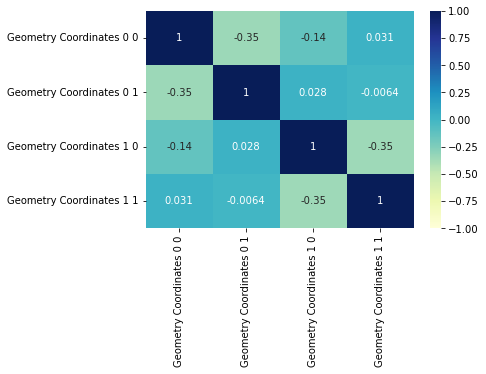

In [15]:
sns.heatmap(GC_corr, annot = True, vmin = -1, vmax = 1, cmap="YlGnBu")
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data1.drop(['Actual_timestamp', 'Estimated_timestamp'],axis=1), 
                                                    data1['Estimated_timestamp'], test_size=0.20, 
                                                    random_state=8)

In [25]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
accuracy = model.score(X_test, y_test)
print(accuracy*100,'%')